In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("mymoviedb.csv", lineterminator='\n')


In [6]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [26]:
data['Release_Date']=pd.to_datetime(data['Release_Date']).dt.year

In [27]:
data=data.drop(['Overview','Original_Language','Poster_Url'],axis=1)

In [28]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [29]:
data['Vote_Average'].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [30]:
def cat(data,col,lab):
    cate_value=[
        data[col].describe()['min'],
        data[col].describe()['25%'],
        data[col].describe()['50%'],
        data[col].describe()['75%'],
        data[col].describe()['max']]
    data[col]=pd.cut(data[col],cate_value,labels=lab,duplicates='drop')
    return data

In [31]:
la=['not_popular','below_avg','average','popular']
data=cat(data,'Vote_Average',la)

In [32]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [33]:
data['Genre']=data['Genre'].str.split(', ')

In [34]:
data=data.explode('Genre').reset_index(drop=True)

In [35]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [36]:
import seaborn as sns

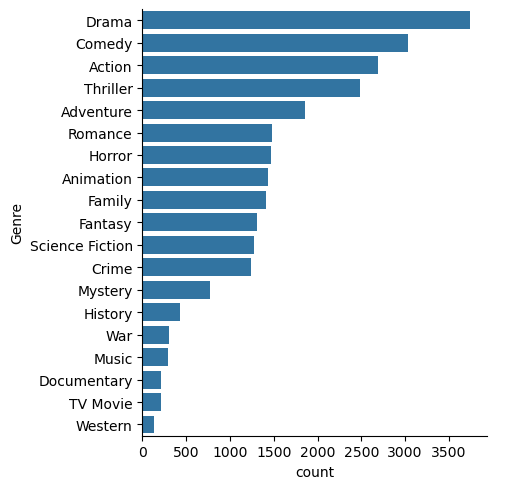

In [37]:
sns.catplot(y='Genre',data=data,kind='count',
           order=data['Genre'].value_counts().index)

In [38]:
data['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

In [39]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


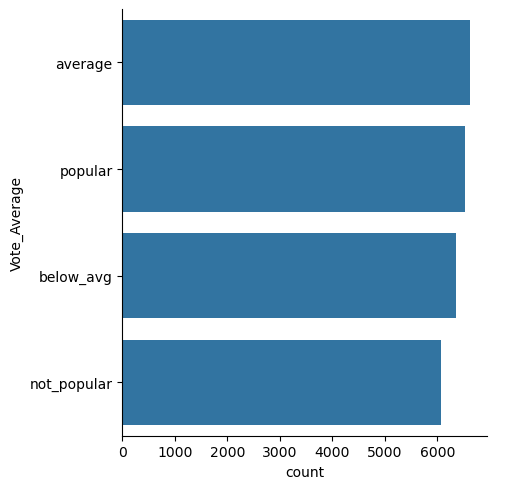

In [40]:
sns.catplot(y="Vote_Average",data=data,kind='count',
            order=data['Vote_Average'].value_counts().index)

In [41]:
data[data['Popularity']==data['Popularity'].describe()['max']]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [42]:
data[data['Popularity']==data['Popularity'].describe()['min']]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


<Axes: >

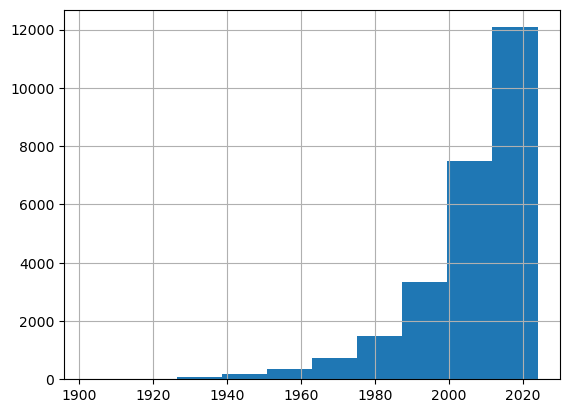

In [43]:
#sns.catplot(y='Release_Date',data=data,kind='count',order=data['Release_Date'].value_counts().index)
data['Release_Date'].hist()

In [44]:
data.to_csv("calculated_netflix_data.csv",index=False)

# some analysis

## 1.What are the top 5 most frequent gener on netflix?

In [45]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


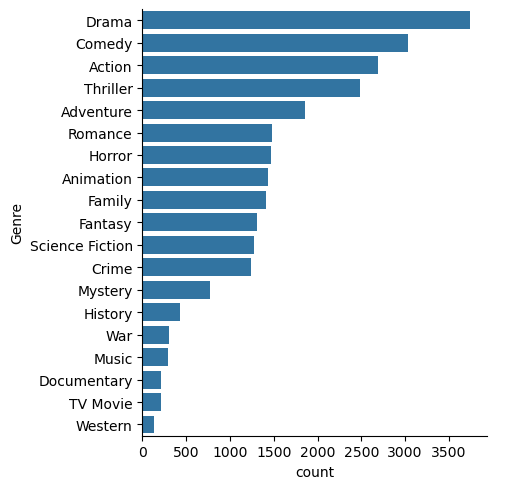

In [47]:
sns.catplot(y="Genre",data=data,kind="count",order=data['Genre'].value_counts().index)

In [52]:
top_genre=data['Genre'].value_counts()

In [55]:
top_genre[:5]

Genre
Drama        3744
Comedy       3031
Action       2686
Thriller     2488
Adventure    1853
Name: count, dtype: int64

## 2.Which genre has the lowest number of moves?

In [58]:
lowest_genre=(data['Genre'].value_counts())[::-1]

In [62]:
lowest_genre[:1]

Genre
Western    137
Name: count, dtype: int64

### 3.what are the top 10 most popular movies on netflix?

In [76]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [77]:
top_10_movies=pd.DataFrame({"Title":data["Title"],"Vote_Count":data["Vote_Count"]})

In [81]:
top_10_movies=top_10_movies.drop_duplicates()

In [82]:
top_10_movies=top_10_movies.sort_values(by="Vote_Count",ascending=False)

In [84]:
top_10_movies.head(10)

,Title,Vote_Count
1091,Inception,31077
1309,Interstellar,27975
630,The Dark Knight,26994
396,The Avengers,26490
555,Deadpool,26390
262,Avatar,25011
198,Avengers: Infinity War,24079
3469,Guardians of the Galaxy,24024
1164,Fight Club,23620
3724,Pulp Fiction,22733


## 4.What is the oldest movie available on Netflix?

In [85]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [86]:
data_based_on_time=data.sort_values(by='Release_Date')

In [90]:
data_based_on_time=data_based_on_time.drop('Genre',axis=1)

In [91]:
data_based_on_time=data_based_on_time.drop_duplicates()

In [93]:
data_based_on_time.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average
16441,1902,A Trip to the Moon,18.356,1284,popular
17131,1920,The Cabinet of Dr. Caligari,17.858,1075,popular
21085,1921,The Phantom Carriage,15.371,213,popular


## 5.Which year received the highest average movies votes?

In [100]:
non_duplicate_data=data.drop('Genre',axis=1)

In [101]:
non_duplicate_data=non_duplicate_data.drop_duplicates()

In [102]:
average_movies=non_duplicate_data[['Release_Date','Vote_Average']]

In [105]:
average_movies=average_movies[average_movies['Vote_Average']=='average']

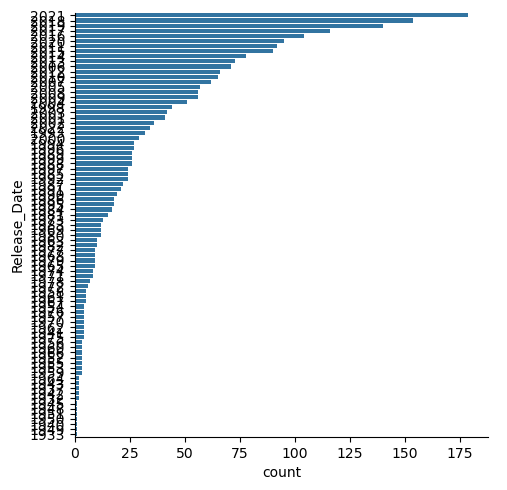

In [114]:
sns.catplot(y='Release_Date',data=average_movies,kind='count',
           order=average_movies['Release_Date'].value_counts().index)

In [113]:
average_movies['Release_Date'].value_counts().head(5)

Release_Date
2021    179
2018    154
2019    140
2017    116
2016    104
Name: count, dtype: int64

## 6.What is the correlation between popularity and number of votes?

In [115]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [116]:
non_duplicate_data=data.drop('Genre',axis=1)

In [117]:
non_duplicate_data=non_duplicate_data.drop_duplicates()

In [124]:
correlation=non_duplicate_data['Popularity'].corr(non_duplicate_data['Vote_Count'])

In [125]:
correlation

0.13739975816244465

## 7.What is the average number of movies release per year

In [150]:
non_dup = data.drop('Genre',axis=1)

In [151]:
non_dup = non_dup.drop_duplicates()

In [152]:
number_years = non_dup['Release_Date'].nunique()

In [153]:
number_movies = non_dup['Title'].nunique()

In [154]:
average_movies_release_per_year = number_movies//number_years

In [155]:
average_movies_release_per_year

93

## 8.Which genre should Netflix focus on based on rising popularity trends

In [157]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [199]:
trends=data.drop(['Title','Vote_Count','Vote_Average'],axis=1)

In [200]:
trends

,Release_Date,Popularity,Genre
0,2021,5083.954,Action
1,2021,5083.954,Adventure
2,2021,5083.954,Science Fiction
3,2022,3827.658,Crime
4,2022,3827.658,Mystery
...,...,...,...
25788,2021,13.354,Drama
25789,2021,13.354,History
25790,1984,13.354,War
25791,1984,13.354,Drama


In [209]:
trends=trends.sort_values(by='Release_Date')


In [239]:
genre_uni=trends['Genre'].unique()
c=[]

In [240]:
for i in genre_uni[:]:
    a=trends[trends['Genre']==i]
    year_uni=a['Release_Date'].unique()
    k=[]
    for j in year_uni:
        b=a[a["Release_Date"]==j]
        avg_popular=b['Popularity'].sum()//b['Popularity'].count()
        k.append([j,avg_popular])
    c.append([i,k]) 
        #print(i,j,avg_popular)

In [241]:
c

[['Science Fiction',
  [[1902, 18.0],
   [1927, 18.0],
   [1931, 17.0],
   [1933, 21.0],
   [1935, 18.0],
   [1943, 13.0],
   [1951, 16.0],
   [1953, 20.0],
   [1954, 16.0],
   [1955, 14.0],
   [1956, 15.0],
   [1958, 13.0],
   [1960, 19.0],
   [1961, 15.0],
   [1962, 16.0],
   [1963, 16.0],
   [1964, 14.0],
   [1965, 15.0],
   [1966, 31.0],
   [1967, 36.0],
   [1968, 32.0],
   [1969, 17.0],
   [1970, 23.0],
   [1971, 27.0],
   [1972, 17.0],
   [1973, 19.0],
   [1974, 13.0],
   [1975, 17.0],
   [1976, 16.0],
   [1977, 31.0],
   [1978, 27.0],
   [1979, 26.0],
   [1980, 21.0],
   [1981, 22.0],
   [1982, 26.0],
   [1983, 19.0],
   [1984, 19.0],
   [1985, 21.0],
   [1986, 21.0],
   [1987, 27.0],
   [1988, 23.0],
   [1989, 21.0],
   [1990, 38.0],
   [1991, 34.0],
   [1992, 35.0],
   [1993, 40.0],
   [1994, 37.0],
   [1995, 30.0],
   [1996, 22.0],
   [1997, 30.0],
   [1998, 23.0],
   [1999, 29.0],
   [2000, 20.0],
   [2001, 25.0],
   [2002, 28.0],
   [2003, 32.0],
   [2004, 24.0],
   [2005, 

In [242]:
from scipy.stats import linregress

In [247]:
incre_list=[]
for i,genre in enumerate(genre_uni):
    slope,intercept,r_value,p_value,std_err=linregress([x[0] for x in c[i][1]],[x[1] for x in c[i][1]])
    incre_list.append([genre,slope])

In [248]:
incre_list.sort()

In [249]:
incre_list[::-1]

[['Western', 0.8779034925809621],
 ['War', 0.4732915975638999],
 ['Thriller', 0.5303550938157399],
 ['TV Movie', 0.4019606851269185],
 ['Science Fiction', 0.5268809191184574],
 ['Romance', 0.2262319925909842],
 ['Mystery', 0.6122652519093758],
 ['Music', 0.328156306964552],
 ['Horror', 0.3434865764374226],
 ['History', 0.2376481392826786],
 ['Fantasy', 0.4539011150714496],
 ['Family', 0.230410710055844],
 ['Drama', 0.2417814495799634],
 ['Documentary', 0.22294609720796082],
 ['Crime', 0.8123466525640256],
 ['Comedy', 0.3744416642480136],
 ['Animation', 0.18239098199135304],
 ['Adventure', 0.5605864232059002],
 ['Action', 0.6642094750137628]]